# Step 4.1 - Model and evaluation

## A. Import thư viện

In [1]:
# 1. Import library
import lib.step1ml_utilis_summaryPre_processing as pre
import lib.step2ml_utils_feature_selection as fea
import lib.step3ml_utils_model_design_testing_regression as reg
import lib.step4ml_utils_model_design_testing_explainability as exp
import lib.step5ml_utils_model_design_testing_visualize_models as vis
import lib.step6ml_utils_model_design_testing_geospatial_analysis as geo
import lib.step9ml_Text_Kmeans_Clustering as clu
import lib.step11ml_utilis_model_design_time_series as clu
import matplotlib
import matplotlib_inline
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

# B. Model

### 1.0. Upload dữ liệu

In [2]:
import pandas as pd
dir_file = "data/avocado_model.csv"
df = pd.read_csv(dir_file)
df.head()

,Unnamed: 0,fea_date,fea_average_price,fea_total_Volume,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,...,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,4,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


### 1.1. Chọn lst_k_best

In [3]:
lst_k_best_option1 = ['fea_average_price','fea_type_organic', 'fea_large_bags', 'fea_item_4046', 'fea_item_4225', 'fea_small_bags', 'fea_total_Bags', 'fea_item_4770', 'fea_month', 
    'total_volumn_item', 'fea_total_Volume','fea_xlarge_bags' ]
lst_name = ['fea_type_organic', 'fea_large_bags', 'fea_item_4046',  'fea_item_4225', 'fea_small_bags', 'fea_total_Bags', 'fea_item_4770', 'fea_month', 
    'total_volumn_item', 'fea_total_Volume','fea_xlarge_bags' ]
    


In [4]:
data_model_k_best_option1 = df[lst_k_best_option1]

### 1.2. Check data

In [5]:
check = pre.data_preprocessing(data_model_k_best_option1, y="fea_average_price", task="regression")

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


### 1.3. Chia dữ liệu

In [6]:
dtf_train, dtf_test = pre.dtf_partitioning(data_model_k_best_option1, y="fea_average_price", test_size=0.3, shuffle=False)

X_train shape: (12774, 11) | X_test shape: (5475, 11)
y_train mean: 1.29 | y_test mean: 1.67
12 features: ['fea_type_organic', 'fea_large_bags', 'fea_item_4046', 'fea_item_4225', 'fea_small_bags', 'fea_total_Bags', 'fea_item_4770', 'fea_month', 'total_volumn_item', 'fea_total_Volume', 'fea_xlarge_bags']


### 1.4. Thực hiện model

In [7]:
X = data_model_k_best_option1.drop(['fea_average_price'], axis=1)
y = data_model_k_best_option1['fea_average_price']

In [8]:
# Chia dữ liệu (Data splitting)
X_train, X_test, y_train, y_test = reg.train_test_split(X, y, random_state=42, test_size=0.3)

In [9]:
X_train = X_train[lst_name].values
y_train = y_train.values

In [10]:
X_test = X_test[lst_name].values
y_test = y_test.values

In [11]:
check = pre.data_preprocessing(data_model_k_best_option1, y="fea_average_price", task="regression")

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


In [12]:
model_rf = reg.ExtraTreesRegressor()
model_rf = model_rf.fit(X_train, y_train)

In [13]:
# tinh RMSE, MAE, R^2
model = model_rf
print('Train Dataset RMSE: ', reg.mean_squared_error(y_true=y_train, y_pred=model.predict(X_train), squared=False))
print('Test Dataset RMSE: ', reg.mean_squared_error(y_true=y_test, y_pred=model.predict(X_test), squared=False))
print('Train Dataset R-square: ', model.score(X_train, y_train))
print('Test Dataset R-square: ', model.score(X_test, y_test))

Train Dataset RMSE:  2.054694778505688e-15
Test Dataset RMSE:  0.17015874371870207
Train Dataset R-square:  1.0
Test Dataset R-square:  0.820538537872606


### 1.5. Đánh giá

In [20]:
y_pred=model.predict(X_train)
predicted=model.predict(X_test)

array([0.987 , 1.2136, 1.4532, ..., 1.9933, 1.7283, 1.3187])

R2 (explained variance): 1.0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.0
Mean Absolute Error (Σ|y-pred|/n): 0
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0
Max Error: -0


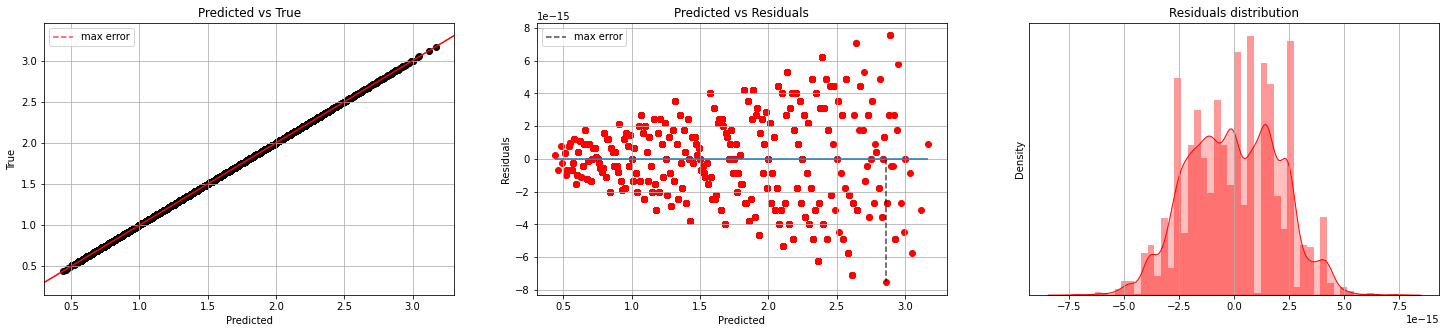

In [15]:
reg.evaluate_regr_model(y_train, y_pred, figsize=(25,5))

R2 (explained variance): 0.82
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.08
Mean Absolute Error (Σ|y-pred|/n): 0
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0
Max Error: 1


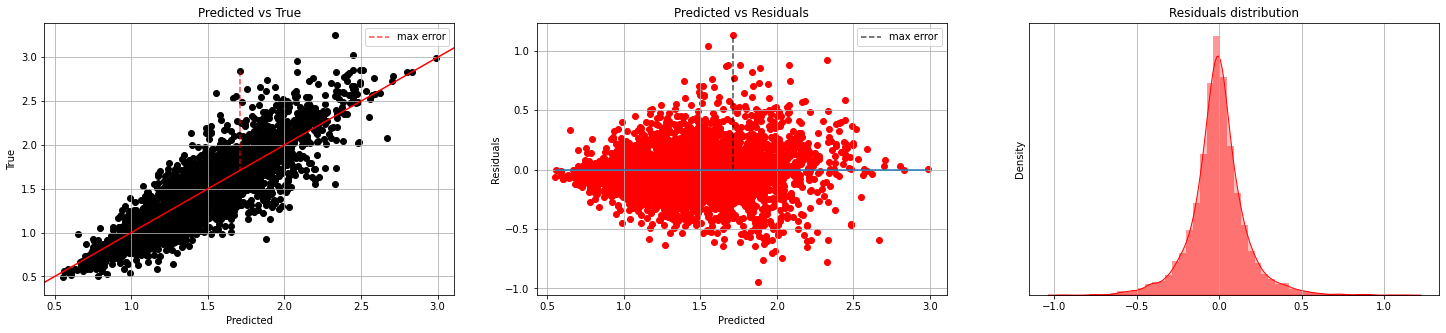

In [16]:
reg.evaluate_regr_model(y_test, predicted, figsize=(25,5))

True: 1 --> Pred: 1


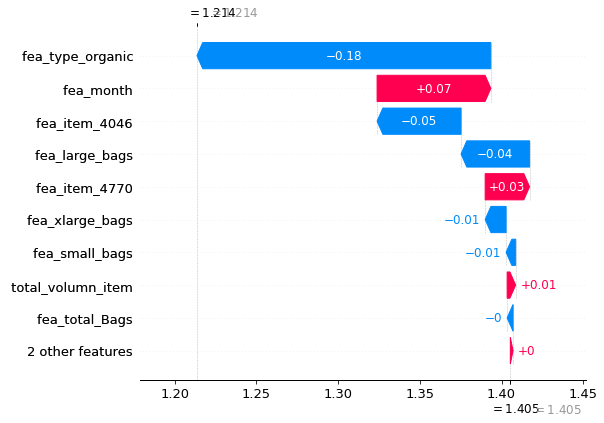

In [17]:
i = 1
print("True:", "{:,.0f}".format(y_test[i]), "--> Pred:", "{:,.0f}".format(predicted[i]))

exp.explainer_shap(model, lst_name, X_instance=X_test[i], X_train=None, task="regression", top=10)

### Nhận xét:
- R2 của tập train và test tưng ứng: 100% và 89% tương ứng cách khoảng 11% => cho nên có thể dẫn tới overfitting
- MAE: Khoảng cách sai sót giữa test: 0.06

In [18]:
import pickle
def Save_Object(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)
    return
def Load_Object(filename):
    with open(filename, 'rb') as file:
        obj = pickle.load(file)
    return obj

In [19]:
Save_Object(model_rf, 'model_price.pkl')